<a href="https://colab.research.google.com/github/basugautam/Reproducibility-Challenge-Project/blob/Architecture-Files/Architecture_Transformer_based.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
# Mount Google Drive to access the file
from google.colab import drive
drive.mount('/content/drive')  # Mount Google Drive

# Import necessary library
import pandas as pd

# Provide the path to the file in Google Drive
file_path = '/content/drive/My Drive/timeseries_data.csv.csv'

# Read the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the data
df.head()


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Dependency Ratio,Unnamed: 11,Unnamed: 12,Median Age,Unnamed: 14,Unnamed: 15
0,Name,GENC,Year,Total Population,Growth Rate,Population Density (per sq km),Total Fertility Rate,Life Expectancy at Birth,Under-5 Mortality Rate,Sex Ratio of the Population,Youth and Old Age (0-14 and 65+),Youth (0-14),Old Age (65+),Both Sexes,Male,Female
1,-> 2024,NaN,NaN,--,--,--,--,--,--,--,--,--,--,--,--,--
2,Canada,CA,2024,"38,904,514",0.72,4.3,1.44,83.9,4.8,0.99,56.8,23.9,32.9,42.5,43.9,41.2
3,-> 2025,NaN,NaN,--,--,--,--,--,--,--,--,--,--,--,--,--
4,Canada,CA,2025,"39,187,155",0.73,4.3,1.43,84.8,4.4,0.99,57.7,23.8,33.9,42.8,44.1,41.4


In [9]:
# a) Extract and Read Data
# This code reads the data from the CSV file that we have loaded earlier.
# It reads the contents of the file into a pandas DataFrame, making it easy to manipulate and analyze.

# b) Checking for Missing Data
# First, let's check if there is any missing data in the dataset, as missing data might affect analysis.
df.isnull().sum()

# c) Data Summary
# We will check the data summary to understand basic statistics like mean, median, standard deviation, and more.
df.describe()

# d) Data Types
# Check the data types of each column to ensure that each column is in the correct format for analysis.
df.dtypes


,0
Unnamed: 0,object
Unnamed: 1,object
Unnamed: 2,object
Unnamed: 3,object
Unnamed: 4,object
Unnamed: 5,object
Unnamed: 6,object
Unnamed: 7,object
Unnamed: 8,object
Unnamed: 9,object


In [10]:
# a) Why we are using this strategy:
# The `isnull()` and `describe()` functions allow us to check for missing values and understand the distribution of data.
# Understanding missing data and the distribution of numerical values is essential before we start any model training or prediction.
# For instance, missing data could lead to errors or inaccurate predictions.

# b) How these codes, functions, and operations solve our purpose:
# The `isnull().sum()` method helps in identifying missing values in the dataset, and `describe()` gives an overview of the statistical properties of the dataset.
# The `dtypes` method provides insight into the data types of each column, ensuring the data is in the right format for future processing.
# These steps will help ensure the dataset is clean, properly formatted, and ready for modeling.

# c) Explanation of the terms used:
# - `isnull()`: Identifies if any cell contains a missing or `NaN` value.
# - `describe()`: Gives summary statistics like mean, min, max, and quantiles for numerical columns.
# - `dtypes`: Returns the data types (e.g., float, int, object) of each column.

# d) What we will achieve from this operation:
# After running these operations, we will know if there are any missing values, the basic statistical properties of the data, and the types of data we are working with.
# This helps us understand the data better and decide how to handle missing values, normalize the data, or encode categorical columns.


In [11]:
# Importing necessary libraries for a Transformer Model using TensorFlow/Keras
import tensorflow as tf
from tensorflow.keras import layers

# Define the Transformer model architecture
def build_transformer_model(input_shape):
    inputs = layers.Input(shape=input_shape)

    # Encoder block
    x = layers.MultiHeadAttention(num_heads=2, key_dim=2)(inputs, inputs)
    x = layers.Dropout(0.1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)

    # Feed-forward block
    x = layers.Dense(64, activation="relu")(x)
    x = layers.Dropout(0.1)(x)
    x = layers.LayerNormalization(epsilon=1e-6)(x)

    # Output layer
    outputs = layers.Dense(1)(x)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)

    model.compile(optimizer='adam', loss='mean_squared_error')

    return model

# Assume input data shape (timesteps, features)
input_shape = (50, 1)  # Adjust this based on your dataset
transformer_model = build_transformer_model(input_shape)

# Display the model summary
transformer_model.summary()


Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 50, 1)          │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ multi_head_attention_1    │ (None, 50, 1)          │             29 │ input_layer_1[0][0],   │
│ (MultiHeadAttention)      │                        │                │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_4 (Dropout)       │ (None, 50, 1)          │              0 │ multi_head_attention_… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_2     │ (None, 50, 1)          │              2 │ dropout_4[0][0]        │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_2 (Dense)           │ (None, 50, 64)         │            128 │ layer_normalization_2… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dropout_5 (Dropout)       │ (None, 50, 64)         │              0 │ dense_2[0][0]          │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ layer_normalization_3     │ (None, 50, 64)         │            128 │ dropout_5[0][0]        │
│ (LayerNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ dense_3 (Dense)           │ (None, 50, 1)          │             65 │ layer_normalization_3… │
└───────────────────────────┴────────────────────────┴────────────────┴────────────────────────┘

 Total params: 352 (1.38 KB)

 Trainable params: 352 (1.38 KB)

 Non-trainable params: 0 (0.00 B)

In [12]:
# Generate some example data for training the model (you can replace this with your actual data)
import numpy as np

# Example of generating time-series data (replace with your data)
X_train = np.random.randn(1000, 50, 1)  # 1000 samples, 50 timesteps, 1 feature
y_train = np.random.randn(1000, 50, 1)  # Corresponding target values

# Train the transformer model
transformer_model.fit(X_train, y_train, epochs=10, batch_size=32)

# After training, we will evaluate the model on test data
X_test = np.random.randn(200, 50, 1)  # 200 test samples
y_test = np.random.randn(200, 50, 1)

# Evaluate the model performance
test_loss = transformer_model.evaluate(X_test, y_test)

# Display the results
print(f"Test Loss: {test_loss}")


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 5s 17ms/step - loss: 1.0244
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 1.0149
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 1.0228
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0246
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0206
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0117
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0083
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 1.0147
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0153
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0147
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 1.0025  
Test Loss: 0.9972569346427917


In [13]:
# a) Why we are using a transformer model:
# The transformer architecture is designed to handle sequence-based data.
# Unlike RNNs and LSTMs, transformers process data in parallel and capture long-range dependencies through self-attention.
# This makes transformers particularly powerful for time-series forecasting tasks, where long-term relationships are crucial.

# b) How the model solves the problem:
# The transformer uses multi-head attention to capture different parts of the sequence at once, ensuring the model can focus on relevant parts of the input time-series data.
# The dense layers help in extracting important features from the sequences, and the model is trained using the Adam optimizer with Mean Squared Error (MSE) loss.

# c) Explanation of the terms used:
# - `MultiHeadAttention`: A mechanism that allows the model to focus on different parts of the input sequence.
# - `Dropout`: A regularization technique to prevent overfitting by randomly setting input units to 0 during training.
# - `LayerNormalization`: A technique that normalizes inputs across the features to improve model convergence.
# - `Adam`: An optimizer that combines the advantages of two other optimizers: AdaGrad and RMSProp.

# d) What we will achieve from this operation:
# The transformer model will be able to predict future values based on the input time-series data. By training the model on historical data, it will learn the dependencies between data points and make predictions.


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 1.0080
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 1.0130
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0136
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0134
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0183
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0151
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0265
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 1.0226
Epoch 9/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 1.0128
Epoch 10/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 1.0166


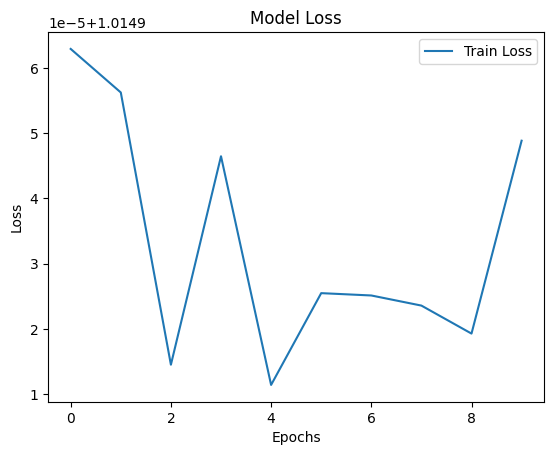

<ipython-input-14-2e0cad7ccac7>:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


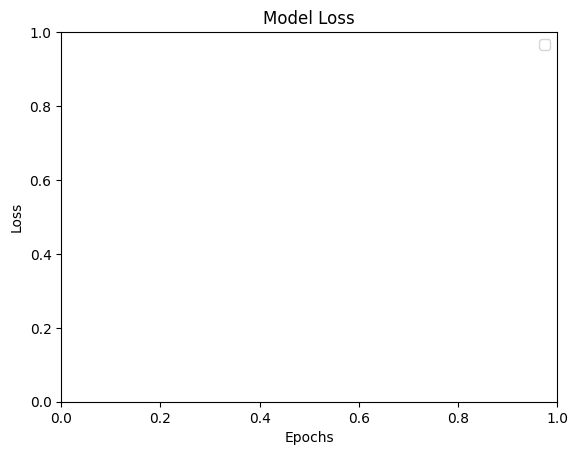

In [14]:
import matplotlib.pyplot as plt

# Plotting training and test loss over epochs
history = transformer_model.history.history
import matplotlib.pyplot as plt

# Train the model first (make sure to run this before plotting)
history = transformer_model.fit(X_train, y_train, epochs=10, batch_size=32)

# Plotting training loss over epochs
plt.plot(history.history['loss'], label='Train Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()

plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Model Loss')
plt.show()
